<a href="https://colab.research.google.com/github/JRONC/Proyecto2025-bioinform/blob/main/scripts%20/1-bases%20de%20datos%20gen%C3%B3micas/1_gen_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📘 Instalación de Biopython
!pip install biopython

# 📚 Importar librerías necesarias
from Bio import Entrez, SeqIO
import matplotlib.pyplot as plt

# 📧 Configurar tu correo electrónico (requerido por NCBI)
Entrez.email = "jhomageme@gmail.com"  # Reemplaza con tu correo



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.5 MB/s eta 0:00:00


In [9]:
import pandas as pd

# 🧬 Paso 1: Definir una lista de IDs de genes de interés
# Puedes añadir o quitar IDs según tus necesidades
gene_ids = {
    "Homo sapiens": "NM_000506.5",
    "Bos Taurus": "NM_173877.1",
    "Mus Musculus": "NM_010168.4",
    "Gallus gallus": "NM_204605.2",
    "Xenopus laevis": "NM_001091823.1",
    "Anolis carolinensis": "XM_003214595.4",
    "Taeniopygia guttata": "XM_002198777.7",
    "Danio rerio": "NM_213390.2",
    "Takifugu rubripes": "NM_001032692.1",
    "Canis lupus familiaris": "XM_038424479.1"
}

all_gene_stats = []

# 🔄 Paso 2: Iterar sobre cada gen, obtener y procesar su secuencia
for gene_name, gene_id in gene_ids.items():
    print(f"\nProcesando el gen: {gene_name} (ID: {gene_id})")

    # 📧 Asegurarse de que el correo electrónico esté configurado para Entrez
    Entrez.email = "jhomageme@gmail.com" # Reemplaza con tu correo si es necesario

    try:
        # Obtener la secuencia desde NCBI
        handle = Entrez.efetch(db="nucleotide", id=gene_id, rettype="fasta", retmode="text")
        record = SeqIO.read(handle, "fasta")
        handle.close()

        # Guardar la secuencia en un archivo FASTA específico para cada gen
        output_filename = f"{gene_name.replace(' ', '_')}_{gene_id}.fasta"
        with open(output_filename, "w") as output_handle:
            SeqIO.write(record, output_handle, "fasta")
        print(f"Secuencia de {gene_name} guardada en '{output_filename}'")

        # Leer el archivo FASTA (opcional, ya tenemos el record)
        # parsed_record = SeqIO.read(output_filename, "fasta")
        sequence = record.seq

        # Calcular estadísticas básicas
        sequence_length = len(sequence)
        gc_content = 100 * float(sequence.count("G") + sequence.count("C")) / sequence_length

        # Almacenar las estadísticas
        all_gene_stats.append({
            "Gene": gene_name,
            "ID": gene_id,
            "Length": sequence_length,
            "GC_Content": gc_content
        })

        # Mostrar estadísticas individuales
        print(f"  🧬 ID de la secuencia: {record.id}")
        print(f"  📏 Longitud de la secuencia: {sequence_length} pares de bases")
        print(f"  🧪 Contenido GC: {gc_content:.2f}%")

    except Exception as e:
        print(f"  Error al procesar {gene_name} ({gene_id}): {e}")

# 📊 Paso 3: Mostrar un resumen de las estadísticas de todos los genes
df_gene_stats = pd.DataFrame(all_gene_stats)
print("\n--- Resumen de Estadísticas de Genes ---")
display(df_gene_stats)


Procesando el gen: Homo sapiens (ID: NM_000506.5)
Secuencia de Homo sapiens guardada en 'Homo_sapiens_NM_000506.5.fasta'
  🧬 ID de la secuencia: NM_000506.5
  📏 Longitud de la secuencia: 1990 pares de bases
  🧪 Contenido GC: 58.29%

Procesando el gen: Bos Taurus (ID: NM_173877.1)
Secuencia de Bos Taurus guardada en 'Bos_Taurus_NM_173877.1.fasta'
  🧬 ID de la secuencia: NM_173877.1
  📏 Longitud de la secuencia: 2005 pares de bases
  🧪 Contenido GC: 60.90%

Procesando el gen: Mus Musculus (ID: NM_010168.4)
Secuencia de Mus Musculus guardada en 'Mus_Musculus_NM_010168.4.fasta'
  🧬 ID de la secuencia: NM_010168.4
  📏 Longitud de la secuencia: 1994 pares de bases
  🧪 Contenido GC: 54.71%

Procesando el gen: Gallus gallus (ID: NM_204605.2)
Secuencia de Gallus gallus guardada en 'Gallus_gallus_NM_204605.2.fasta'
  🧬 ID de la secuencia: NM_204605.2
  📏 Longitud de la secuencia: 2990 pares de bases
  🧪 Contenido GC: 44.85%

Procesando el gen: Xenopus laevis (ID: NM_001091823.1)
Secuencia de Xe

,Gene,ID,Length,GC_Content
0,Homo sapiens,NM_000506.5,1990,58.291457
1,Bos Taurus,NM_173877.1,2005,60.897756
2,Mus Musculus,NM_010168.4,1994,54.714142
3,Gallus gallus,NM_204605.2,2990,44.849498
4,Xenopus laevis,NM_001091823.1,2008,48.954183
5,Anolis carolinensis,XM_003214595.4,2066,46.176186
6,Taeniopygia guttata,XM_002198777.7,2035,46.928747
7,Danio rerio,NM_213390.2,2417,44.517998
8,Takifugu rubripes,NM_001032692.1,1839,51.604133
9,Canis lupus familiaris,XM_038424479.1,2074,57.232401


/tmp/ipython-input-2908711673.py:8: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


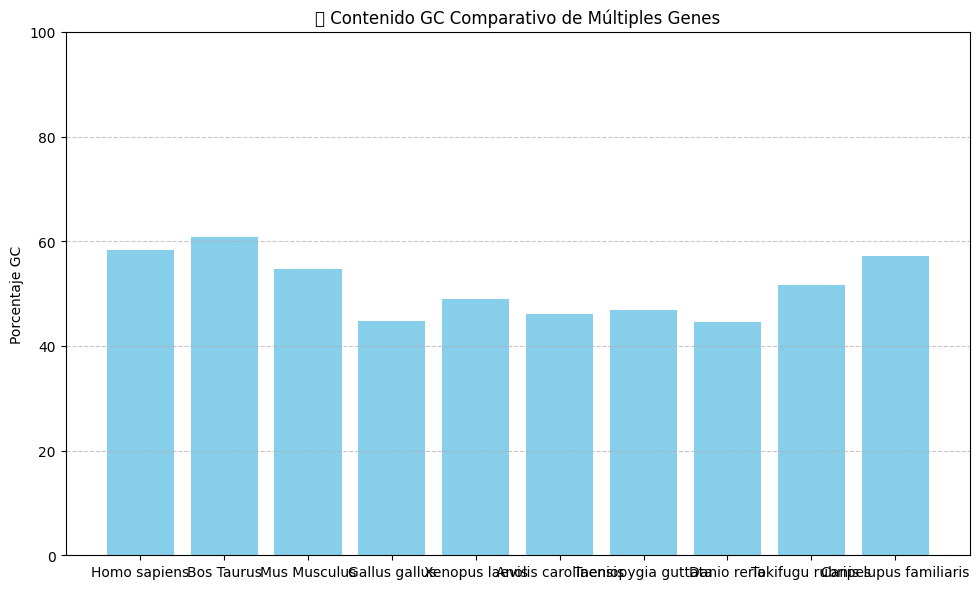

In [10]:
# 📈 Paso 4: Graficar el contenido GC de todos los genes
plt.figure(figsize=(10, 6))
plt.bar(df_gene_stats["Gene"], df_gene_stats["GC_Content"], color="skyblue")
plt.ylabel("Porcentaje GC")
plt.title("🧬 Contenido GC Comparativo de Múltiples Genes")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()